Estudante: Raquel Kotzias
#### Prova 1 de Controle

In [82]:
from numpy import linspace, zeros, arange, e, sqrt, pi, abs
from control import c2d, tf, pzmap
from control.matlab import rlocus
from math import degrees, tan
from cmath import phase, rect
import matplotlib.pyplot as plt

# 1.

In [4]:
T = .2

Fs = tf([1],[1, 4])
Gs = tf(10, [1, 5])
Hs = tf(1, [1, 0])

Fz = c2d(Fs, T)
Gz = c2d(Gs, T)
Hz = c2d(Hs, T)

print(f'F(z) = {Fz}  G(z) = {Gz}  H(z) = {Hz}')

F(z) = 
  0.1377
----------
z - 0.4493

dt = 0.2
  G(z) = 
  1.264
----------
z - 0.3679

dt = 0.2
  H(z) = 
 0.2
-----
z - 1

dt = 0.2



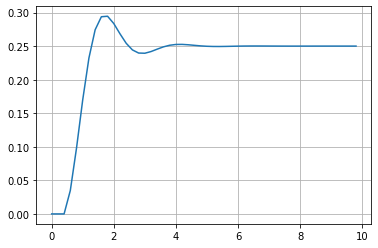

In [8]:
kmax = 50
t = T*arange(0, kmax)
r = t

x = zeros(kmax)
v = zeros(kmax)
c = zeros(kmax)
e = x - v

for k in range (1, kmax):
    x[k] = 0.1377*r[k-1] + 0.4493*x[k-1]
    v[k] = 0.2*c[k-1] + v[k-1]
    e[k] = x[k] - v[k]
    c[k] = 1.2642*e[k-1] + 0.3679*c[k-1]
    
plt.plot(t, c)
plt.grid()
plt.show()

# 2.

In [9]:
T = 0.15
zeta = 0.6
wn = 4

Gs = tf([1], [1, 5])
Gz = c2d(Gs, T)

Gz

TransferFunction(array([0.10552669]), array([ 1.        , -0.47236655]), 0.15)

In [19]:
beta1 = -1
alpha = -0.4724

z1_mod = e**(-T*zeta*wn)
z1_fase = T*wn*sqrt(1-zeta**2)

z1 = rect(z1_mod, z1_fase)

print(f'|z1| = {z1_mod:.4f}  |  <z1 = {degrees(z1_fase):.2f}°')
print(f'z1 = {z1:.4f}')

|z1| = 0.6977  |  <z1 = 27.50°
z1 = 0.6188+0.3222j


In [87]:
Cz = tf(Gz.den[0][0], [1], T)

Ci = tf(1, [1, beta1], T)

ang = -pi - phase(Cz(z1)) - phase(Ci(z1)) - phase(Gz(z1))

print(f"angulo = {ang}")

angulo = -0.7017192389872595


In [45]:
beta2 = z1.imag/tan(-ang) - z1.real

print(f'beta2 = {beta2}')

beta2 = -0.2376707179366172


In [52]:
Cp = tf(1, [1, beta2], T)

FTMA_sK = Cz*Ci*Cp*Gz
print(f'<FTMA = {degrees(phase(FTMA_sK(z1)))}')

<FTMA = 180.0


In [81]:
Kc = 1/abs(FTMD_sK(z1))

print(f'Kc = {Kc:.4f}')

FTMA = Kc*FTMA_sK
print(f'|FTMA| = {abs(FTMA(z1))}')

Kc = 2.3604
|FTMA| = 1.0


Gc(z) =2.3604 *    z -0.4724
               --------------------
                (z -1)*(z -0.2377)
Gc(z) = 
    2.36 z - 1.115
----------------------
z^2 - 1.238 z + 0.2377

dt = 0.15



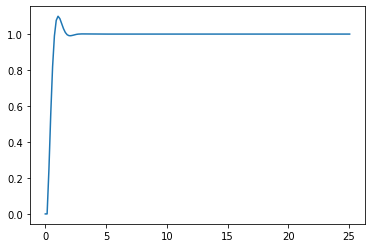

In [89]:
C = Cz*Ci*Cp*Kc

print(f'Gc(z) ={Kc:.4f} *    z {alpha}')
print(f'               --------------------')
print(f'                (z {beta1})*(z {beta2:.4f})')
print(f'Gc(z) = {C}')

Tf = 2
kmax = int(Tf/T)

t = T*arange(0, kmax)
FTMF = FTMA/(1 + FTMA)
y, t = step(FTMF)
plt.plot(t, y)

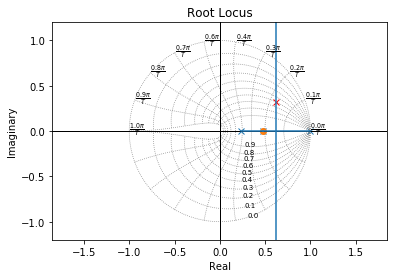

x vermelho é o local de z1


In [85]:
_, _ = rlocus(FTMA, [0, 1, 2, 3, 4])
plt.plot(z1.real, z1.imag, 'xr')
plt.xlim(-1, 1)
plt.ylim(-1.2, 1.2)
plt.show()

p, z = pzmap(FTMA, plot=False)
print("x vermelho é o local de z1")

In [84]:
print(f'polos = {p}')
print(f'zeros = {z}')

polos = [1.        +0.j 0.47236655+0.j 0.23767072+0.j]
zeros = [0.47236655+0.j]
